# CS345 Project

DATASET: https://www.kaggle.com/datasets/jpmiller/police-violence-racial-equity

## Introduction
The project we worked on was about police violence in America. In the United States, police violence, especially against African Americans, is a large issue. Since the Black Lives Matter protests of 2020, there has been discussion about the cause of police violence, and what we can do to stop this. For our project, we wanted to analyze data about police arressts, including where it happens, the people it happens to, and other factors that affect these communities. With this data, we can find out more about the relationship between the police and different communities, and hopefully find ways to stop police violence.


### Dataset and Method
The dataset we used was one from Kaggle. It shows data about police arrests the United States, based on factors such as age, race, and gender. The data is divided into 5 folders, 4 of which have 5 csv files, the other one having pdfs. To interpret this, we looked at the csv files that would give us the data that we would need. We decided to focus on race and age for this project, since that has been the major talking point in the field of police violence. The arrests would give us information on whether there is a bias against certain  communities. So, we checked out all the files that would be relevant fo this project. We settled on using two specific ones. The first file was a csv file for juvinile arrests made by police since the 90s, based on race. The second file was also a csv file, this time looking at police arrests for adults. The linear classifier we decide to use was an SVM. This was one that we had the most experience in, so it would be easy to use. It also suited the needs for this dataset.
Aryan set up the jupyter notebook, and the SVM algorithm. He had originally set up a perceptron to use, but this was changed once new information about the project was learned. Adam downloaded the dataset. Aryan recoreded down the introduction, method, and conclusion. Adam did the coding for the dataset with the SVM. He first preprocessed the datasets to make sure that there were no null values. This was done by manually going through the data points and removing the null values. Once the data was cleaned,Adam created the train and test samples. Once those were made, Adam created the SVM. He then created graphs based on the data. After that, he calculated the mean standard error, the mean, and the standard deviation. Aryan then took these graphs and data, and interpreted what they could mean, which he wrote about it the Results Discussion. Finally, Aryan concluded the project by writing the conclusion section.

### Code, Graphs, and Data
For both our juvenile arrests dataset and our national adults arrests dataset, we will train an SVM to predict and correlate an arrest rate based on race or ethnicity. After doing so, we will compare the predictions between both demographics to see whether juveniles or national adults are racially biased against by police more than the other group.

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


## Load Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.multioutput import MultiOutputRegressor

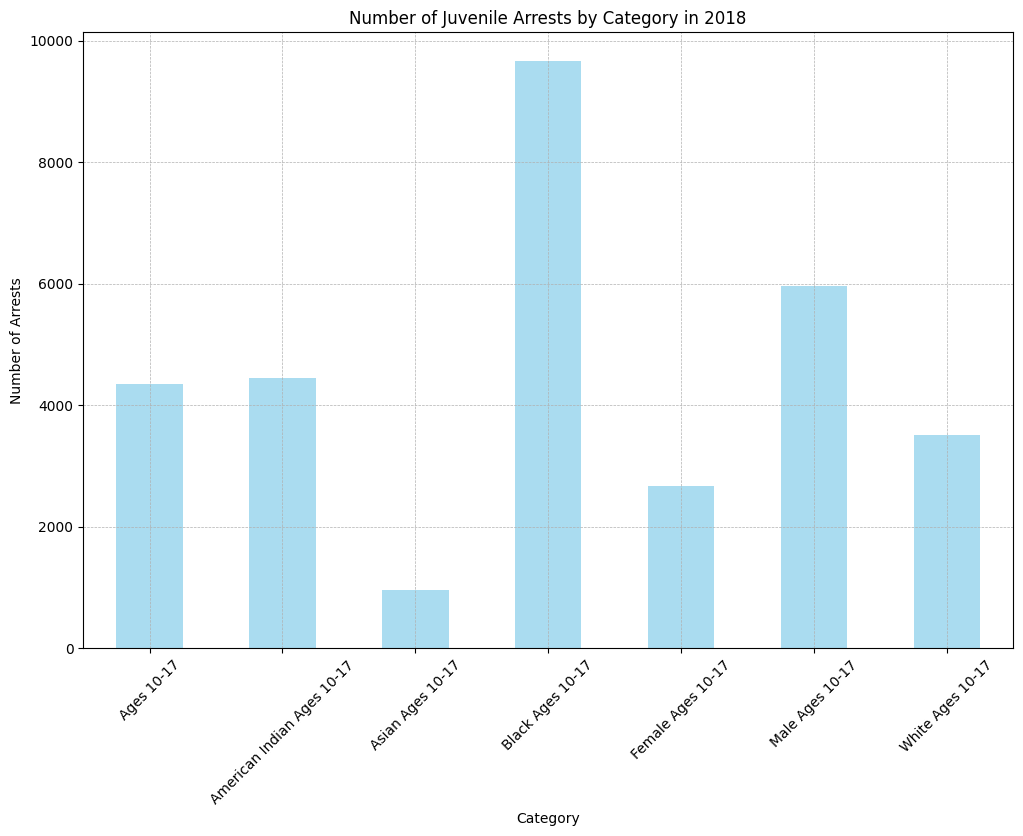

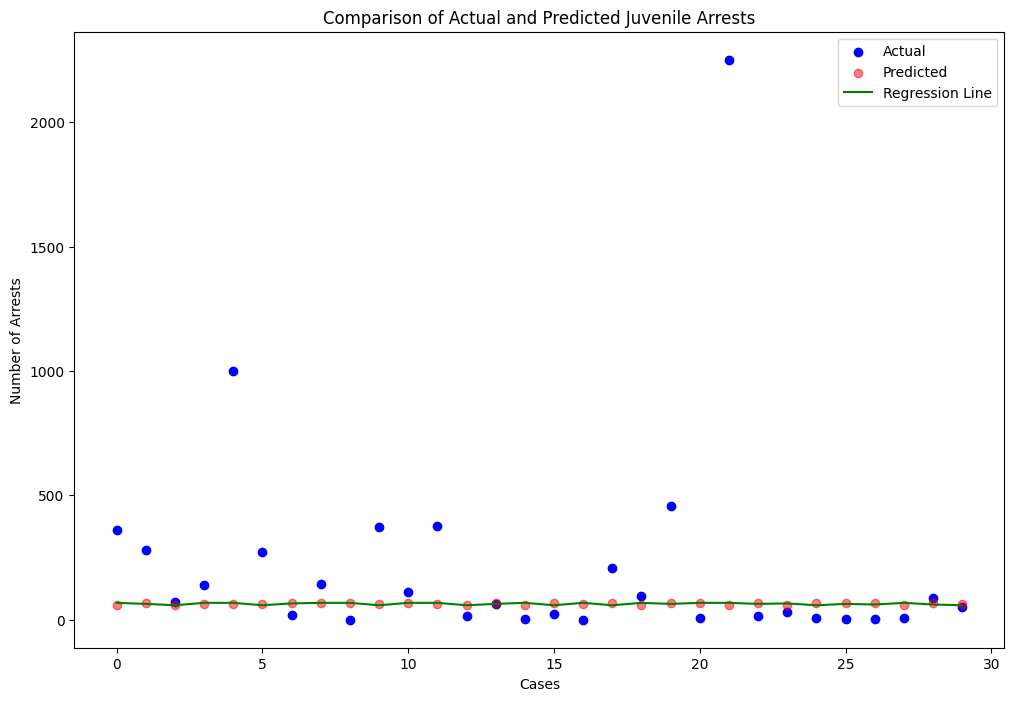

Mean Squared Error of Juvenile Arrests:  209659.12300069252
Mean of Juvenile Arrests:  63.97066281506709
Standard Deviation of Juvenile Arrests:  4.039444128302838


In [ ]:
## JUVENILE ARRESTS
juvenileArrestData = pd.read_csv("juvenile_arrests2.csv")
## JUVENILE CATEGORY ABBREVIATIONS FOR PLOTTING
abbreviations = {
    "Juvenile Arrest Rates (Arrest of Persons Age 10-17/100,000 Persons Ages 10-17)": "Ages 10-17",
    "Juvenile Male Arrest Rates (Arrests of Males Ages 10-17/100,000 Males Ages 10-17)": "Male Ages 10-17",
    "Juvenile Female Arrest Rates (Arrests of Females Ages 10-17/100,000 Females Ages 10-17)": "Female Ages 10-17",
    "White Juvenile Arrest Rates (Arrests of Whites Ages 0 to 17/100,000 Whites Ages 10 to 17)": "White Ages 10-17",
    "Black Juvenile Arrest Rates (Arrests of Blacks Ages 0 to 17/100,000 Blacks Ages 10 to 17)": "Black Ages 10-17",
    "American Indian Juvenile Arrest Rates (Arrests of American Indians Ages 0 to 17/100,000 American Indians Ages 10 to 17)": "American Indian Ages 10-17",
    "Asian Juvenile Arrest Rates (Arrests of Asians Ages 0 to 17/100,000 Asians Ages 10 to 17)": "Asian Ages 10-17"
}

le = LabelEncoder()
scaler = StandardScaler()
categories = juvenileArrestData['Category'].copy() ## Categorical Copy for plotting
juvenileArrestData['Category'] = le.fit_transform(juvenileArrestData['Category'])

## Juvenile Arrests by Category in 2018 BAR GRAPH
category_counts = juvenileArrestData.groupby(categories.map(abbreviations))['2018'].sum()
plt.figure(figsize=(12, 8))
category_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Number of Juvenile Arrests by Category in 2018')
plt.xlabel('Category')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

## SVM Model
X_juvenile = juvenileArrestData[['Category']]
y_juvenile = juvenileArrestData['2018']

X_juvenile = scaler.fit_transform(X_juvenile)

X_j_train, X_j_test, y_j_train, y_j_test = train_test_split(X_juvenile, y_juvenile, test_size=0.2, random_state=42)

svmJuvenile = svm.SVR() ## SVR svm

svmJuvenile.fit(X_j_train, y_j_train)

predictJuvenile = svmJuvenile.predict(X_j_test)

sort_idx = np.argsort(y_j_test)
y_j_test_sorted = np.array(y_j_test)[sort_idx]
predictJuvenile_sorted = predictJuvenile[sort_idx]

# Scatter Plot of Actual vs SVM predicted Juvenile Arrest values
plt.figure(figsize=(12, 8))
plt.scatter(range(len(y_j_test)), y_j_test, color='blue', label='Actual')
plt.scatter(range(len(predictJuvenile)), predictJuvenile, color='red', label='Predicted', alpha=0.5)
plt.plot(range(len(predictJuvenile_sorted)), predictJuvenile_sorted, color='green', label='Regression Line')
plt.title('Comparison of Actual and Predicted Juvenile Arrests')
plt.xlabel('Cases')
plt.ylabel('Number of Arrests')
plt.legend()
plt.show()

# Juvenile MSE, Mean, and STD
mseJuvenile = mean_squared_error(y_j_test, predictJuvenile) ## Juvenile MSE
meanJuvenile = np.mean(predictJuvenile) ## Juvenile Mean
stdJuvenile = np.std(predictJuvenile) ## Juvenile STD

print("Mean Squared Error of Juvenile Arrests: ", mseJuvenile)
print("Mean of Juvenile Arrests: ", meanJuvenile)
print("Standard Deviation of Juvenile Arrests: ", stdJuvenile)

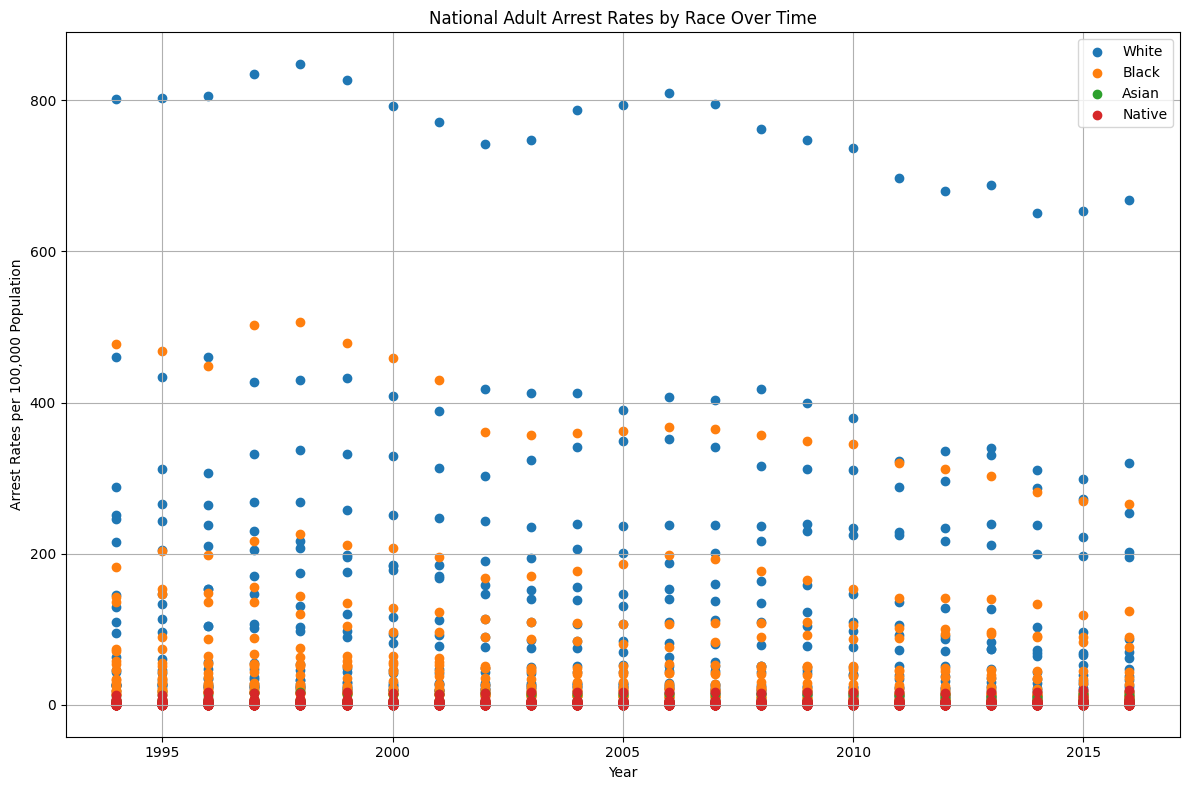

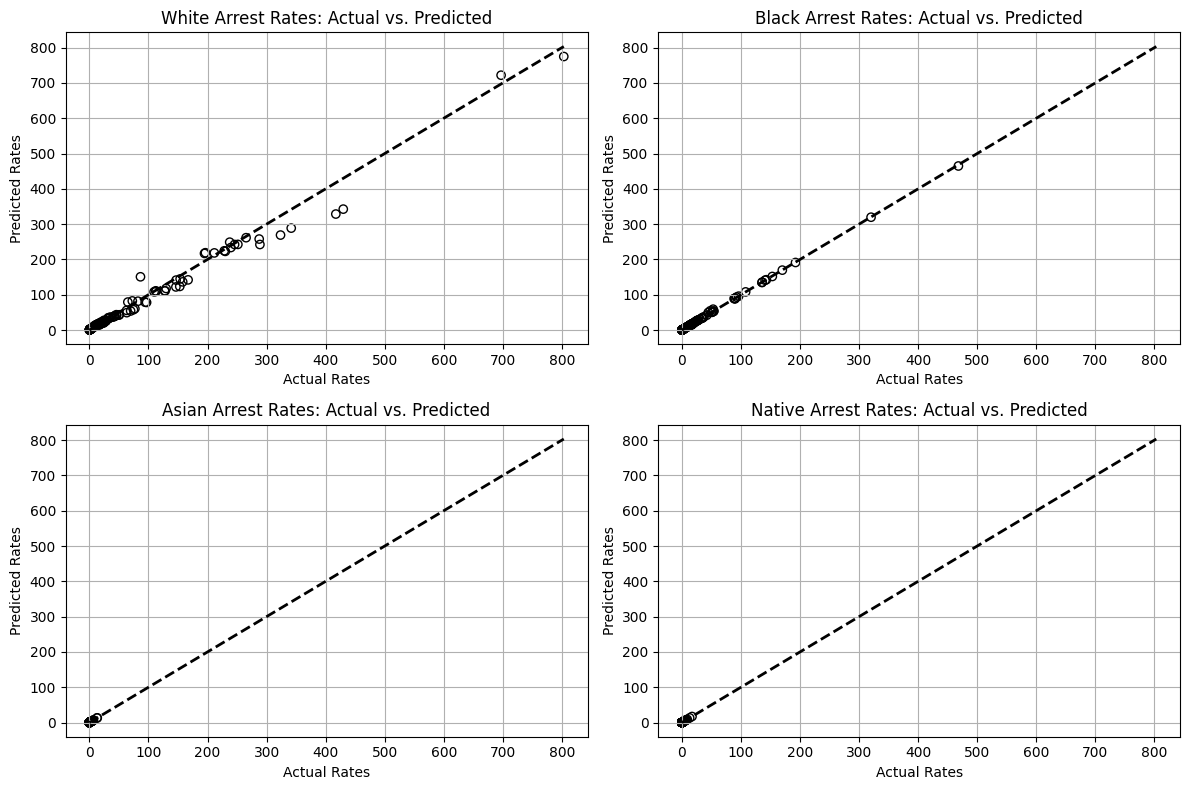

Mean Squared Error of Adult Arrests:  71.94634991025856
Mean of Adult Arrests:  26.474341599052284
Standard Deviation of Adult Arrests:  72.27199821720707


In [ ]:
## NATIONAL ADULT ARRESTS
adultArrestData = pd.read_csv("arrests_national_adults.csv")
# relevant columns: year, race_population, and arrests by race
race_data = adultArrestData[['year', 'race_population', 'white', 'black', 'asian_pacific_islander', 'american_indian']]
raceDataCopy = race_data.copy()
# rates for each race
raceDataCopy.loc[:, 'white_rate'] = (raceDataCopy['white'] / raceDataCopy['race_population']) * 100000
raceDataCopy.loc[:, 'black_rate'] = (raceDataCopy['black'] / raceDataCopy['race_population']) * 100000
raceDataCopy.loc[:, 'asian_rate'] = (raceDataCopy['asian_pacific_islander'] / raceDataCopy['race_population']) * 100000
raceDataCopy.loc[:, 'native_rate'] = (raceDataCopy['american_indian'] / raceDataCopy['race_population']) * 100000

## Adult Arrest Rates by Race Over Time Scatter Plot
plt.figure(figsize=(12, 8))
plt.scatter(raceDataCopy['year'], raceDataCopy['white_rate'], label='White', marker='o')
plt.scatter(raceDataCopy['year'], raceDataCopy['black_rate'], label='Black', marker='o')
plt.scatter(raceDataCopy['year'], raceDataCopy['asian_rate'], label='Asian', marker='o')
plt.scatter(raceDataCopy['year'], raceDataCopy['native_rate'], label='Native', marker='o')
plt.xlabel('Year')
plt.ylabel('Arrest Rates per 100,000 Population')
plt.title('National Adult Arrest Rates by Race Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

X_adult = raceDataCopy[['year', 'white_rate', 'black_rate', 'asian_rate', 'native_rate']].dropna()
y_adult = raceDataCopy[['white_rate', 'black_rate', 'asian_rate', 'native_rate']].dropna()

## SVM Model
X_train, X_test, y_train, y_test = train_test_split(X_adult.drop('year', axis=1), y_adult, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5], y_train.head()
svmAdult = MultiOutputRegressor(SVR(kernel='linear'))
svmAdult.fit(X_train_scaled, y_train)

y_pred = svmAdult.predict(X_test_scaled)

mseAdult = mean_squared_error(y_test, y_pred) ## Adult MSE

## Scatter Plots of each Race for SVM data
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
races = ['White', 'Black', 'Asian', 'Native']
data = {
    'Actual': [y_test['white_rate'].values, y_test['black_rate'].values, y_test['asian_rate'].values, y_test['native_rate'].values],
    'Predicted': [y_pred[:, 0], y_pred[:, 1], y_pred[:, 2], y_pred[:, 3]]
}
for i, ax in enumerate(axs.flat):
    ax.scatter(data['Actual'][i], data['Predicted'][i], edgecolors='k', facecolors='none')
    ax.plot([y_test.min().min(), y_test.max().max()], [y_test.min().min(), y_test.max().max()], 'k--', lw=2)
    ax.set_title(f'{races[i]} Arrest Rates: Actual vs. Predicted')
    ax.set_xlabel('Actual Rates')
    ax.set_ylabel('Predicted Rates')
    ax.grid(True)
plt.tight_layout()
plt.show()

# National Adult MSE, Mean, and STD
mseAdult = mean_squared_error(y_test, y_pred) ## Adult MSE
meanAdult = np.mean(y_pred) ## Adult Mean
stdAdult = np.std(y_pred) ## Adult STD

print("Mean Squared Error of Adult Arrests: ", mseAdult)
print("Mean of Adult Arrests: ", meanAdult)
print("Standard Deviation of Adult Arrests: ", stdAdult)

### Graphs and Statistics Discussion



The graphs show a lot of interesting information. The first graph made was a bar graph, which shows the number of juvenile arrests made, in terms of race. This showed us that African American youths were more likely to be arrested than any other race, and by a wide margin. The dot plot below that shows that our predicted model is close to the actual model, with a few outliers. The next dot plot shows the number of arrests made against adults of different races. This shows that the rates of arrests have been on a decline, and that there are more adult arrests for White Americans. The line graphs we made show the predicted model for arrests for all races, and the actual arrests as points on the graph. White Americans seem to have the least accurate model. This was actually because the dataset we used for adult arrest rates had more data points for White Americans than any other race.

We had different measurments of the data depending on whether we were looking at juvenile arrests or adult arrests. For juvenile arrests, the mean squared error was 209659.12300069252. The mean was 63.97066281506709, while the standard deviation was 4.039444128302838. We got different results for the adult arrests. For adult arrests, the mean squared error was 71.94634991025856. The mean was 26.474341599052284, while the standard deviation was 72.27199821720707. As we can see, the mean is higher for juvenile arrests than adult, and the juvenile dataset has a much lower standard deviation.

## Results Analysis
According to the results shown, there does seem to be some correlation between different communities and arrest rates. The results that we got from above give a lot of insight into the issue of police violence. For youths, African Americans are more likely to be arrested than any other race. This is possibly our most important information, since black youths are typically shown to be the targets of police violence in the news. This can show that there is a bias in the police against this particular demographic. The adult arrest graph shows that the amount of arrests for all demographics are going downward. This can show that there have been postive changes made to the police system, or to society at large. The graph also showed that when it comes to adults, white americans have higher rate of arrest. This could be because of adult African Americans taking extra care to not be on the wrong side of police, which they would've known about since childhood. That would be the best way to explain the change in arrests rates from juvinile to adulthood for African Americans. The measurements of data we got also help contribute to solving the overall problem. The means, standard deviations, and the mean squared errors of the two datasets were very different from each other. This wouldn't normally be an issue, however, the differences were massive. This showed us that data regarding police arrests can be very different across demographics. The mean being much higher in juvinile arrests can show that there are more arrests made toward juveniles in the US, than adults. This can mean that adults are more likely to follow the law, or that they are better at not getting caught. This could also show a bias against juveniles in the US police system. The juvenile arrest dataset also has a lower standard deviation. This can show that the rates regarding arrests for juveniles of different races have been reletively more consistent, while rates regarding arrests for adults of different races are more variable. We took this as a sign that there has been larger changes in the arrest rates of adults over the years, in regards to race. The mean squared error was significantly higher for juvenile arrests than adult arrests. We took this to mean that the models were more accurate for adult arrests than juvenile ones, which makes sense since the adult arrests had more data.




## Final Thoughts
In the end, we were able to successfully train an SVM, with the dataset of our choice. This project taught us a lot, in both technical and non-technical ways. For technical skills, this project taught us more about data management in computer science, and the way that applies to machine learning. While we learnt about this in class, doing this on a hands on project of this size. One of the non technical skills we learned in this project was teamwork. This project forced us to be able to work with people that we didn't know. We had to figure out ways to communicate with each other, even when we were busy with other assignments and couldn't always talk. We had to find out wht each person specialized in, and how those skills could be applied to this project. This project also showed us more about the topic of police violence in America. It showed us that there are general trends that can be found when you read into the data. Hopefully, this project can shed a new light on the topic of police controvery, and help us find a possible solution to make sure our justice system can be reformed